<img src="https://pbs.twimg.com/media/EWjp0c-XQAEqnNV?format=jpg&name=large">

In [1]:
# Ramanujan proved the above identity of pi
# Going to see how fast it converges

# initialize
initial_state = "3 + 1**2"

In [2]:
x = initial_state

In [3]:
"""
My first attempt relies on parsing the string version of the equation.
It's inefficient and OOMs around 46 levels deep. We can do better.

The problem is that it compiles the string and then below I
evaluate it in one go, which for a sufficient amount of nesting 
causes an OOM; more scalable to compute iteratively and then return the 
final value, done below.
"""

def get_final_term(eq): 
    return eq.rsplit(" ")[-1].replace(")","")

def increment(eq, n):
    """
    Starts with the initial equation and returns a Ramanujan 
    equation n levels deep.
    
    e.g. 3**2 --> (3**2 / (6 + 5**2)) would be 1 level deeper.
    """
    for x in range(n):
        last_term = get_final_term(eq)
        new = "(" + last_term + " / " + "(6 + " + str(eval(last_term.split("**")[0])+2) + "**2))"
        new_eq = eq.replace(last_term, new)
        eq = new_eq
    
    return eq

In [4]:
# this works until n = 46, then OOMs
pi_values = []
for i in range(1,47):
    pi_values.append(eval(increment(x,i)))

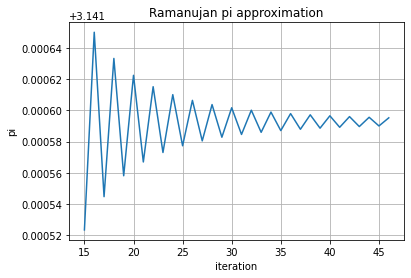

In [6]:
# See how it converges...

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Going deeper into the levels
y = pi_values[14:]
x = range(15,47)

fig, ax = plt.subplots()
ax.plot(x,y)

ax.set(xlabel='iteration', ylabel='pi',
       title='Ramanujan pi approximation')
ax.grid()

plt.show()

In [59]:
# Example of the string it's constructing, which is then evaluted...

print(increment(initial_state,46))

3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + (7**2 / (6 + (9**2 / (6 + (11**2 / (6 + (13**2 / (6 + (15**2 / (6 + (17**2 / (6 + (19**2 / (6 + (21**2 / (6 + (23**2 / (6 + (25**2 / (6 + (27**2 / (6 + (29**2 / (6 + (31**2 / (6 + (33**2 / (6 + (35**2 / (6 + (37**2 / (6 + (39**2 / (6 + (41**2 / (6 + (43**2 / (6 + (45**2 / (6 + (47**2 / (6 + (49**2 / (6 + (51**2 / (6 + (53**2 / (6 + (55**2 / (6 + (57**2 / (6 + (59**2 / (6 + (61**2 / (6 + (63**2 / (6 + (65**2 / (6 + (67**2 / (6 + (69**2 / (6 + (71**2 / (6 + (73**2 / (6 + (75**2 / (6 + (77**2 / (6 + (79**2 / (6 + (81**2 / (6 + (83**2 / (6 + (85**2 / (6 + (87**2 / (6 + (89**2 / (6 + (91**2 / (6 + 93**2))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))


In [8]:
"""
Levels (i.e. depth)
======
1/ 3 + 1**2
2/ 3 + (1**2 / (6 + 3**2))
3/ 3 + (1**2 / (6 + (3**2 / (6 + 5**2))))
4/ 3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + 7**2))))))
5/ 3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + (7**2 / (6 + 9**2))))))))
etc.
"""

'\nLevels\n======\n1/ 3 + 1**2\n2/ 3 + (1**2 / (6 + 3**2))\n3/ 3 + (1**2 / (6 + (3**2 / (6 + 5**2))))\n4/ 3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + 7**2))))))\n5/ 3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + (7**2 / (6 + 9**2))))))))\netc.\n'

In [76]:
"""
Second, proper attempt.
This is far more efficient. Computes the function recursively. 
You tell it what depth you want the function computed to.
It starts at the "deepest" level and then recurses its way "up".
"""

def recursive_method(d):
    pi = 0
    x = 0
    
    # depth must be odd number
    if (d % 2 == 0):
        d += 1
    
    # compute the deepest, most "nested" parens
    result = (d**2 / (6 + (d+2)**2))
    
    # core loop; iterate "upwards" from the innermost parens
    while (d>=5):
        x = (d - 2)**2 / (6 + result)
        d -= 2
        result = x

    pi = 3 + (1**2 / (6 + result))
    return pi

recursive_method(15)

3.142021107132669

In [77]:
## Test
recursive_method(7) == 3 + (1**2 / (6 + (3**2 / (6 + (5**2 / (6 + (7**2 / (6 + 9**2))))))))

True

In [81]:
pis = []
iteration = range(0,20000,2)
for x in (range(0,20000,2)):
    pis.append(recursive_method(x))

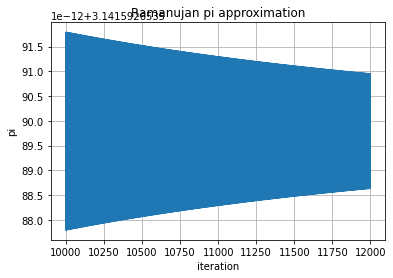

In [89]:
# See how it converges...

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Going deeper into the levels
y = pis[5000:6000]
x = iteration[5000:6000]

fig, ax = plt.subplots()
ax.plot(x,y)

ax.set(xlabel='iteration', ylabel='pi',
       title='Ramanujan pi approximation')
ax.grid()

plt.show()

In [102]:
"""
The Cauchy convergence criterion:

a sequence whose elements become arbitrarily close to each other as the sequence progresses.
More precisely, given any small positive distance, all but a finite number of elements of the 
sequence are less than that given distance from each other.

A s

Informally: if the difference between successive terms is getting smaller, the sequence 
is Cauchy convergent, which we can see from the below.
"""

for x in range(3,200,2):
    print(recursive_method(x)-recursive_method(x-2))

-0.00586080586080584
-0.023736263736263474
0.00932249322493206
-0.00457998618734301
0.002581410874563872
-0.001596390768696665
0.001055484751117497
-0.0007339743911121133
0.0005309391074743708
-0.0003964379971712617
0.00030381578154203837
-0.00023795514188984512
0.0001898442312375792
-0.0001538821552613534
0.0001264625117838314
-0.00010519136490083625
8.843699202243371e-05
-7.506106089438802e-05
6.425294838541262e-05
-5.5424724838548656e-05
4.81429109266962e-05
-4.208313014819609e-05
3.699936389045533e-05
-3.2702724168220954e-05
2.9046553088551974e-05
-2.5915804000575804e-05
2.3219368264104645e-05
-2.0884459245529285e-05
1.8852453197659713e-05
-1.7075775213371003e-05
1.551554383327769e-05
-1.4139772532395511e-05
1.2921984224867344e-05
-1.184013505950432e-05
1.0875771943474888e-05
-1.0013368202166362e-05
9.2397960882451e-06
-8.543905225533166e-06
7.916183640599428e-06
-7.348483613611734e-06
6.833798730454532e-06
-6.366081624520348e-06
5.940094239154092e-06
-5.551284225191466e-06
5.19568